# Perspective Transform
![example](example_grid1.jpg)

In this example we'll apply a perspective transform to the camera images coming from the rover and to shift them from the perspective seen from the rover's camera to one where you're looking down on the worls from above.

First, we need to select four points in your "source" image and map them to four points in our "destination" image, which will be the top-down view. The grid squares on the ground in the simulator represent 1 meter square each so this mapping will also provide us with a distance estimate to everything in the ground plane in the field of view.

Perspective transforms involve some complicated geometry but here we'll use the OpenCV functions *cv2.getPerspectiveTransform()* and *cv2.warpPerspective()* to do the heavy lifting (for more on this and other geometric transforms with OpenCV, check out [this page](https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html)).

So, we'll want to perform the following steps:

* Define 4 source points, in this case, the 4 corners of a grid cell in the image above.
* Define 4 destination points (must be listed in the same order as source points!).
* Use *cv2.getPerspectiveTransform()* to get *M*, the transform matrix.
* Use *cv2.warpPerspective()* to apply *M* and warp your image to a top-down view.

To perform the first step of selecting source points, you could perform some image analysis to identify lines and corners in the image, but you'll only have to do this once, so it is fine to just select points manually using an interactive *matplotlib* window, and plot it in the following manner:

<IPython.core.display.Javascript object>


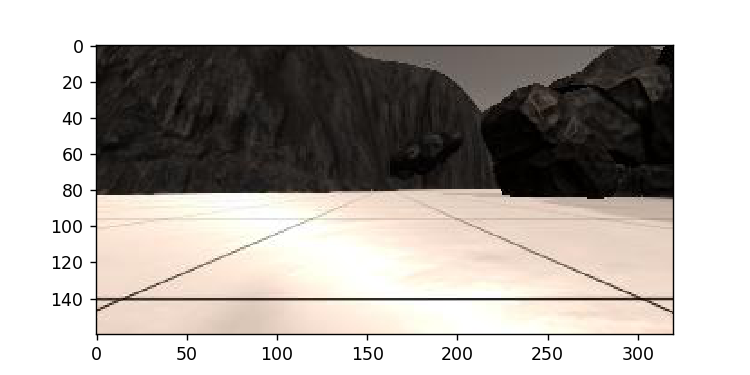

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.figure(figsize=(6, 3))
plt.imshow(image)
plt.show()

In an interactive *matplotlib* window we can read off the pixel coordinates of the cursor in the lower left-hand corner of the window. We can zoom in on each corner of the grid cell in the image (using the zoom tool in the upper-right) to get a better measurement. Take note of the x and y coordinates of each corner.

### Choosing destination points
With the source points chosen, all that's left is choosing destination points. In this case, it makes sense to choose a square set of points so that square meters in the grid are represented by square areas in the destination image. Mapping a one-square-meter grid cell in the image to a square that is 10x10 pixels, for example, implies a mapping of each pixel in the destination image to a 0.1x0.1 meter square on the ground.

**NOTE: mapping each square in the grid to a 10x10 pixel square in your destination image is just a suggestion, you could choose some other scaling. However, some kind of square is preferable so that the scale of the world in x and y is the same in your output.**

In the next exercise we'll be given the function to do the warping with OpenCV. All we need to do is choose four points in the source (original) image, and where they should map to in the destination (output) image. So the job is to fill in the *source* and *destination* arrays below:

    import cv2
    import numpy as np

    def perspect_transform(img, src, dst):

        # Get transform matrix using cv2.getPerspectivTransform()
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp image using cv2.warpPerspective()
        # keep same size as input image
        warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
        # Return the result
        return warped

    # Define source and destination points
    source = np.float32([[ , ], [ , ], [ , ], [ , ]])
    destination = np.float32([[ , ], [ , ], [ , ], [ , ]])      

    warped = perspect_transform(image, source, destination)
    plt.imshow(warped)
    plt.show()

And having cleverly chosen the source and destination points, we'll get a result like this:

![example_transformed](example_grid1-transformed.png)

**Example:** In the image above, the grid cells on the ground have been mapped to 10x10 pixel squares, or in other words, each pixel in this image now represents 10 cm squared in the rover environment. The result looks a little weird, but it is now a top-down view of the world that is visible in the rover camera's field of view, in other words, it's a map!

The mapping is only valid for pixels that lie in the ground plane, given the nature of the perspective transform, but thankfully our rover environment is relatively flat so the light colored areas in this image are a fair representation of the layout of navigable terrain in front of the rover.

#### Try it yourself!
In the exercise below, the perspect_transform() function is all setup, you just need to choose the source and destination points to get a result similar to the one shown above. This is just to get the feel for what you'll do in the project, so don't need to be super accurate here and you could just estimate the source points from the screenshot of the matplotlib window above, and choose destination points to be a 10x10 pixel square near the bottom center of the output image. If you do want to be more accurate, you can download the example grid image here.

<IPython.core.display.Javascript object>


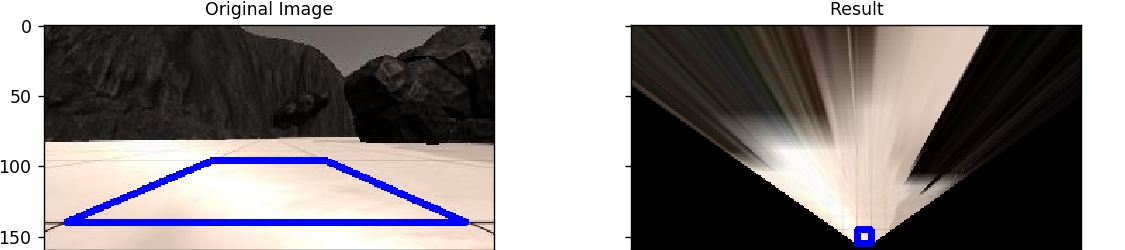

In [3]:
import cv2
import numpy as np

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Right now source and destination are just 
# set to equal the four corners
# of the image so no transform is taking place
# Try experimenting with different values!

source = np.float32([[15 ,140 ], [119 ,96 ], [200 ,96 ], [300 ,140 ]])
destination = np.float32([[160 ,155 ], [160 ,145 ], [170 ,145 ], [170 ,155 ]])      

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 2), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=10)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
#plt.show() # Uncomment if running on your local machine